In [3]:
import numpy as np
#worst case for calculate Loss
def hinge_loss(X, y, w):
    """
    Compute Hinge Loss for multi-class classification.
    
    :param X: Input data (n, d)
    :param y: True labels (n,)
    :param w: Weights (d, c)
    :return: Scalar loss value
    """
    n, c = X.shape[0], w.shape[1]
    
    # Compute the scores (raw model outputs)
    scores = np.dot(X, w)  # (n, c)
    
    # Compute Hinge Loss
    loss = 0
    for i in range(1000):
        correct_class_score = scores[i, y[i]]  # Score for the correct class
        for j in range(c):
            if j != y[i]:  # For all classes except the correct one
                loss += max(0, 1 - correct_class_score + scores[i, j])  # Hinge Loss

    # Average the loss
    loss /= n
    return loss

# Random initialization of data
np.random.seed(0)
n_samples = 10000
n_features = 3073
n_classes = 10

X_train = np.random.randn(n_samples, n_features)  # Input data
y_train = np.random.randint(0, n_classes, size=n_samples)  # Random labels

# Searching for weights with the lowest loss
best_loss = float("inf")
best_W = None

for i in range(100):
    w = np.random.randn(n_features, n_classes) * 0.0001  # Random initialization of weights
    loss = hinge_loss(X_train, y_train, w)  # Compute the loss
    if loss < best_loss:
        best_loss = loss
        best_W = w
    print("In attempt %d the loss was %f, best %f" % (i, loss, best_loss))


In attempt 0 the loss was 0.900209, best 0.900209
In attempt 1 the loss was 0.899898, best 0.899898
In attempt 2 the loss was 0.899976, best 0.899898
In attempt 3 the loss was 0.899937, best 0.899898
In attempt 4 the loss was 0.900040, best 0.899898
In attempt 5 the loss was 0.900059, best 0.899898
In attempt 6 the loss was 0.900047, best 0.899898
In attempt 7 the loss was 0.900152, best 0.899898
In attempt 8 the loss was 0.899868, best 0.899868
In attempt 9 the loss was 0.900350, best 0.899868
In attempt 10 the loss was 0.900265, best 0.899868
In attempt 11 the loss was 0.900211, best 0.899868
In attempt 12 the loss was 0.900062, best 0.899868
In attempt 13 the loss was 0.899897, best 0.899868
In attempt 14 the loss was 0.899516, best 0.899516
In attempt 15 the loss was 0.900225, best 0.899516
In attempt 16 the loss was 0.900470, best 0.899516
In attempt 17 the loss was 0.900063, best 0.899516
In attempt 18 the loss was 0.899827, best 0.899516
In attempt 19 the loss was 0.899877, best

In [4]:
# Multi calss SVM Loss function

def L_i_vectorized(x, y, W):
    scores = W.dot(x)
    margins = np.maximum(0, scores - scores[y] + 1)
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

### Gradient Descent

In [5]:
import numpy as np
#Numerical gradient
def eval_numerical_gradient(f, x):
    """
    A function to compute the numerical gradient of a function f at the point x using finite differences.
    
    :param f: The function to compute the gradient for.
    :param x: The point (numpy array) at which the gradient is computed.
    :return: The gradient (numpy array) at the point x.
    """
    fx = f(x)  # Compute the value of the function at x
    grad = np.zeros_like(x)  # Initialize the gradient array (same shape as x)
    h = 0.00001  # Small step size for finite difference

    # Use np.nditer to iterate over all elements of x (supporting multi-dimensional arrays)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        ix = it.multi_index  # Get the index of the current element
        old_value = x[ix]  # Save the original value of x[ix]
        
        # Evaluate f(x + h) by adding a small step to the current element
        x[ix] += h
        fxh = f(x)  # Compute the function value at x + h
        
        # Restore the original value of x[ix]
        x[ix] = old_value

        # Compute the partial derivative using the finite difference method
        grad[ix] = (fxh - fx) / h
        
        it.iternext()  # Move to the next element

    return grad


#Numerical gradient: Approximate, time-consuming, easy to implement!
#Analytical gradient: Accurate, fast, prone to implementation errors!



In practice:

We always use the analytical gradient.
However, to ensure the correctness of the implementation, we compare the analytical gradient with the numerical gradient.

In [6]:
# Vanilla Gradient Descent Implementation

# Set the condition for continuous updates (e.g., you can break this when convergence is met)
##while True:
    # Calculate the gradient of the loss function with respect to the weights
    # 'evaluate_gradient' is a placeholder for the gradient calculation function
    ##gradient = evaluate_gradient(lossfun, data, weights)
    
    # Update the weights by subtracting the gradient (scaled by the learning rate/step size)
    ##weights += -step_size * gradient  # Gradient descent update rule

    # Optional: Add a stopping condition based on a maximum number of iterations or convergence
    # For example, you can stop the loop when the change in weights is sufficiently small
    # or when the loss function reaches a minimum threshold


A more efficient version of Mini-batch Gradient Descent can be implemented with a few optimizations to reduce redundant computations, speed up execution, and improve memory usage. Below is an optimized version of your code that utilizes vectorized operations where possible and ensures efficient mini-batch sampling and gradient evaluation.

In [7]:
# Mini-batch Gradient Descent Implementation

# Parameters
batch_size = 256  # Size of the mini-batch (number of examples used in each iteration)

while True:
    # Sample a mini-batch of 256 training examples
    # 'sample_training_data' is a function that randomly selects a batch of data points
    data_batch = sample_training_data(data, batch_size)
    
    # Calculate the gradient of the loss function with respect to the weights
    # 'evaluate_gradient' calculates the gradient for the mini-batch of data
    gradient = evaluate_gradient(loss_fun, data_batch, weights)
    
    # Update the weights using the gradient and learning rate (step_size)
    weights += -step_size * gradient  # Gradient update rule
    
    # Optional: Add a stopping condition based on the number of iterations or convergence
    # For example, you can stop after a certain number of iterations or when the loss change is small

NameError: name 'sample_training_data' is not defined

Common values for batch size: 32, 128, and 256.

### **Key Point: Loss Function Plotting**

To ensure the correctness of the algorithm, **the loss function should be plotted** at different intervals during training, showing a decreasing trend over time. This will confirm that the algorithm is converging and minimizing the loss as expected.

In [8]:
# Vanilla Gradient Descent Implementation

# Set the condition for continuous updates (e.g., you can break this when convergence is met)
##while True:
    # Calculate the gradient of the loss function with respect to the weights
    # 'evaluate_gradient' is a placeholder for the gradient calculation function
    ##gradient = evaluate_gradient(lossfun, data, weights)
    
    # Update the weights by subtracting the gradient (scaled by the learning rate/step size)
    ##weights += -step_size * gradient  # Gradient descent update rule

    # Optional: Add a stopping condition based on a maximum number of iterations or convergence
    # For example, you can stop the loop when the change in weights is sufficiently small
    # or when the loss function reaches a minimum threshold


![Example GIF](https://i.sstatic.net/qAx2i.gif)

![Example GIF](https://i.sstatic.net/1obtV.gif)

### Backward Propagation of errors

***an algorithm for supervised learning of artificial neural networks using gradient descent***

# Gradient Computation and Backpropagation

So far, we've defined a **scoring function** where, for each input, we assign scores based on the weights (**W**) for each class. Using these scores, we define a **loss** for each data point. 

One of these loss functions is the **hinge loss**, and we also introduced another loss function called **logistic regression**. By averaging the losses of all the data points in the training set, we calculate the **overall loss**, which tells us how poorly the weights (**W**) are performing:
- The **higher the loss**, the worse **W** is.
- The **lower the loss**, the better.

Additionally, we discussed another term known as **regularization**, which helps us predict well even for new data.

To use the **gradient descent algorithm**, the only thing we need to do is compute the **gradient** of the loss function with respect to the **W** parameters. 

### The Challenge of Gradient Computation
We can take derivatives from simpler functions. However, the issue arises when:
- The function becomes **too complex**, with **nested structures** and **numerous parameters**.
- In some cases, there might even be **millions of parameters**, making it impractical to manually derive each one using mathematical formulas.

### The Solution: Backpropagation
To handle this, we require an **automatic method** to compute these gradients efficiently. This is precisely where the **backpropagation algorithm** comes into play, allowing us to perform these computations automatically and systematically.


![Example GIF](https://miro.medium.com/v2/resize:fit:1280/format:webp/1*VF9xl3cZr2_qyoLfDJajZw.gif)

الگوریتم بک پروپگیشن یک روش محاسباتی خودکار و اتوماتیک می باشد که در جهت به حداقل رساندن تابع لاس نسبت به پارامتر ها استفاده می شود.

که محاسبه ی گرادیان تابع لاس نسبت به پارامتر ها

الگوریتم گرادیان کاهشی با توجه به تابع لاس ، داده ها و پارامتر ها گرادیان را محاسبه می کند

و در قدم بعدی بر خلاف جهت گرادیان به اندازه ی آلفا یک قدم برمی دارد

از آنجایی که تعداد داد ها خیلی زیاد هست، در هر تکرار فقط یخشی از داده ها تحت عنوان بچ به الگوریتم داده می شود.

گرادیان را از روی بچ داده شده تخمین می زنیم

برای محاسبه ی گرادیان یک روش عددی داریم که تقریبی و زمان بر است 

در عمل هر دو را استفاده می کنیم

برای آموزش از گرادیان تحلیلی استفاده میکنیم ولی برای تایید صحت آن از گرادیان عددی کمک میگیریم

که به آن گرادیان چک می گوییم

### Forward Calcualtion Graph

![image.png](Calculation%20Graph.png)

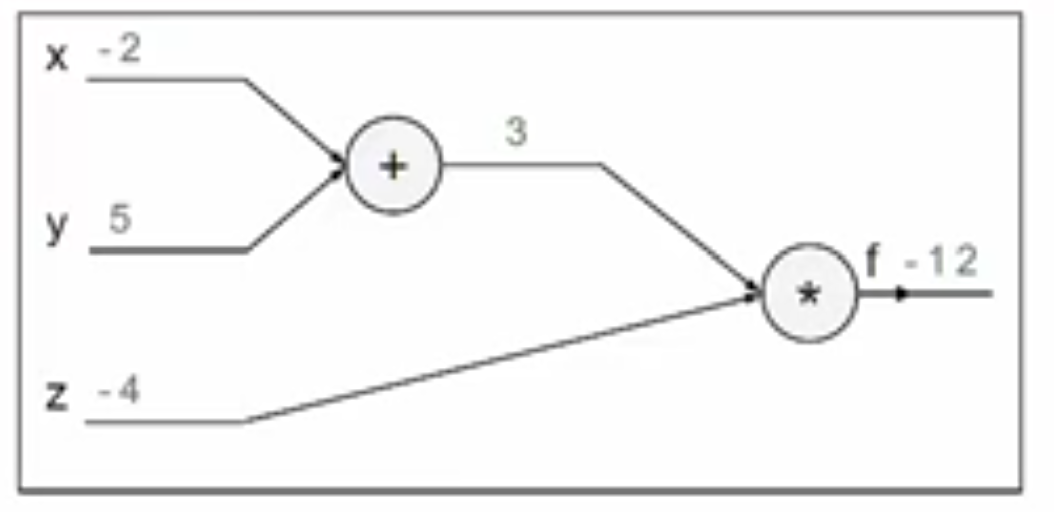

### Back

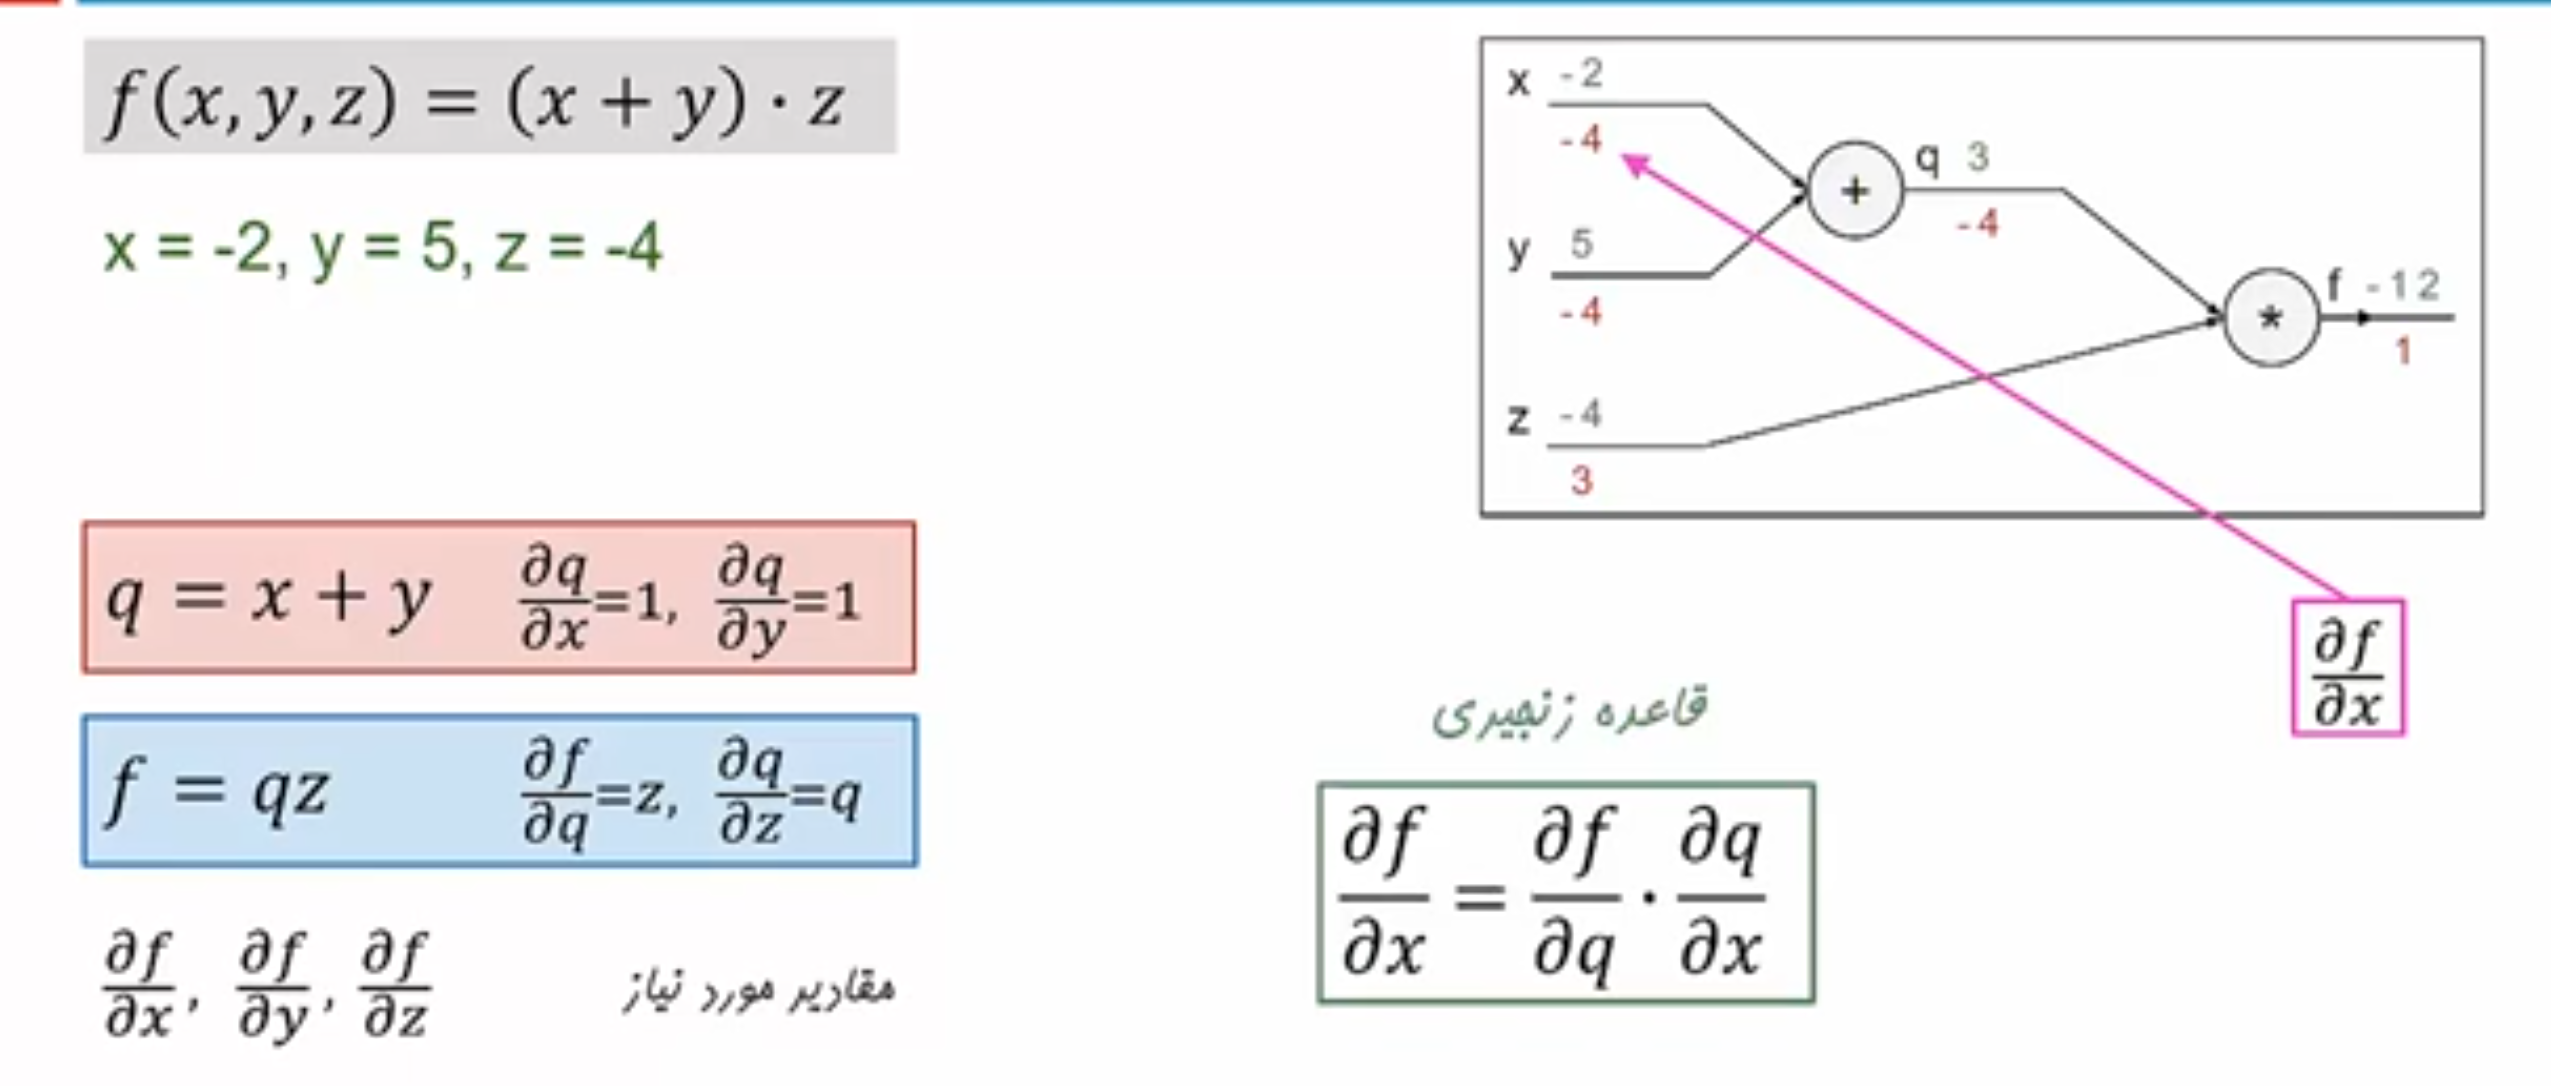

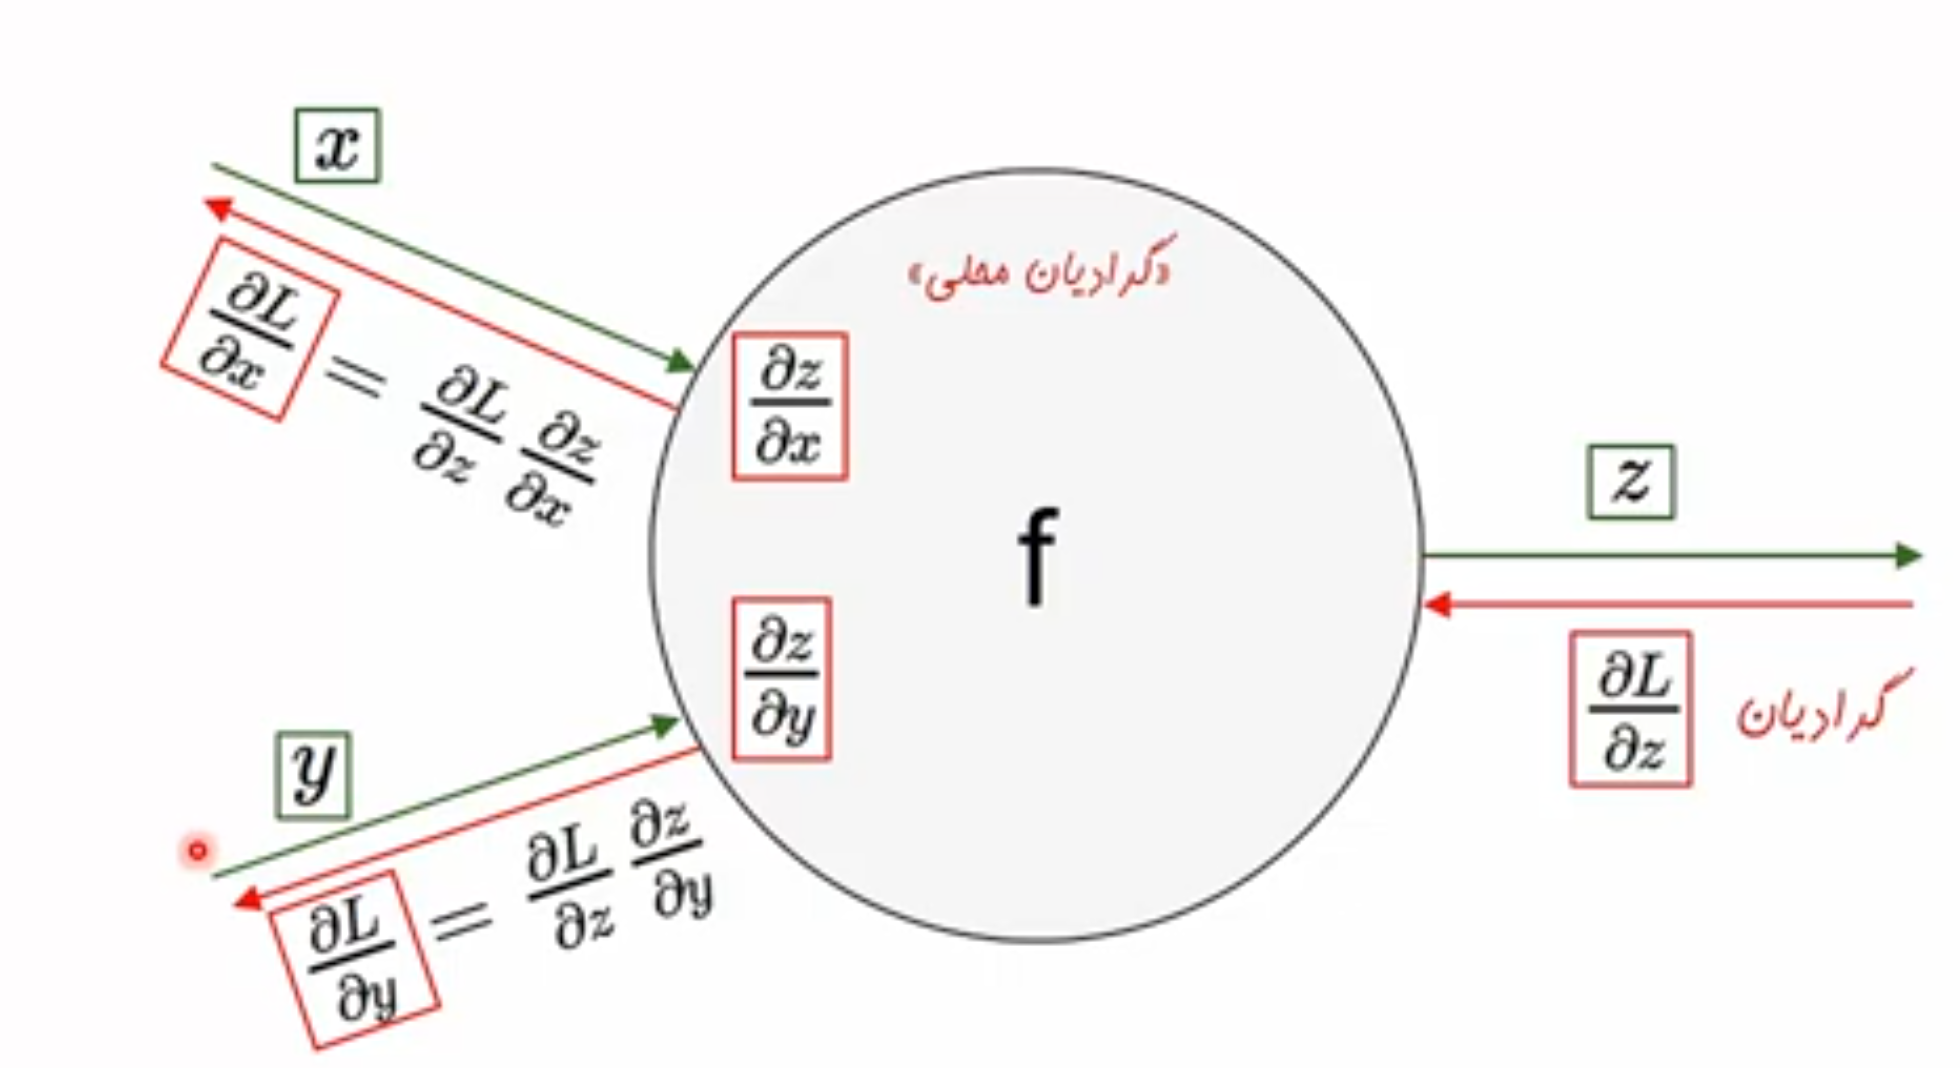

### SoftMax Calculation Graph

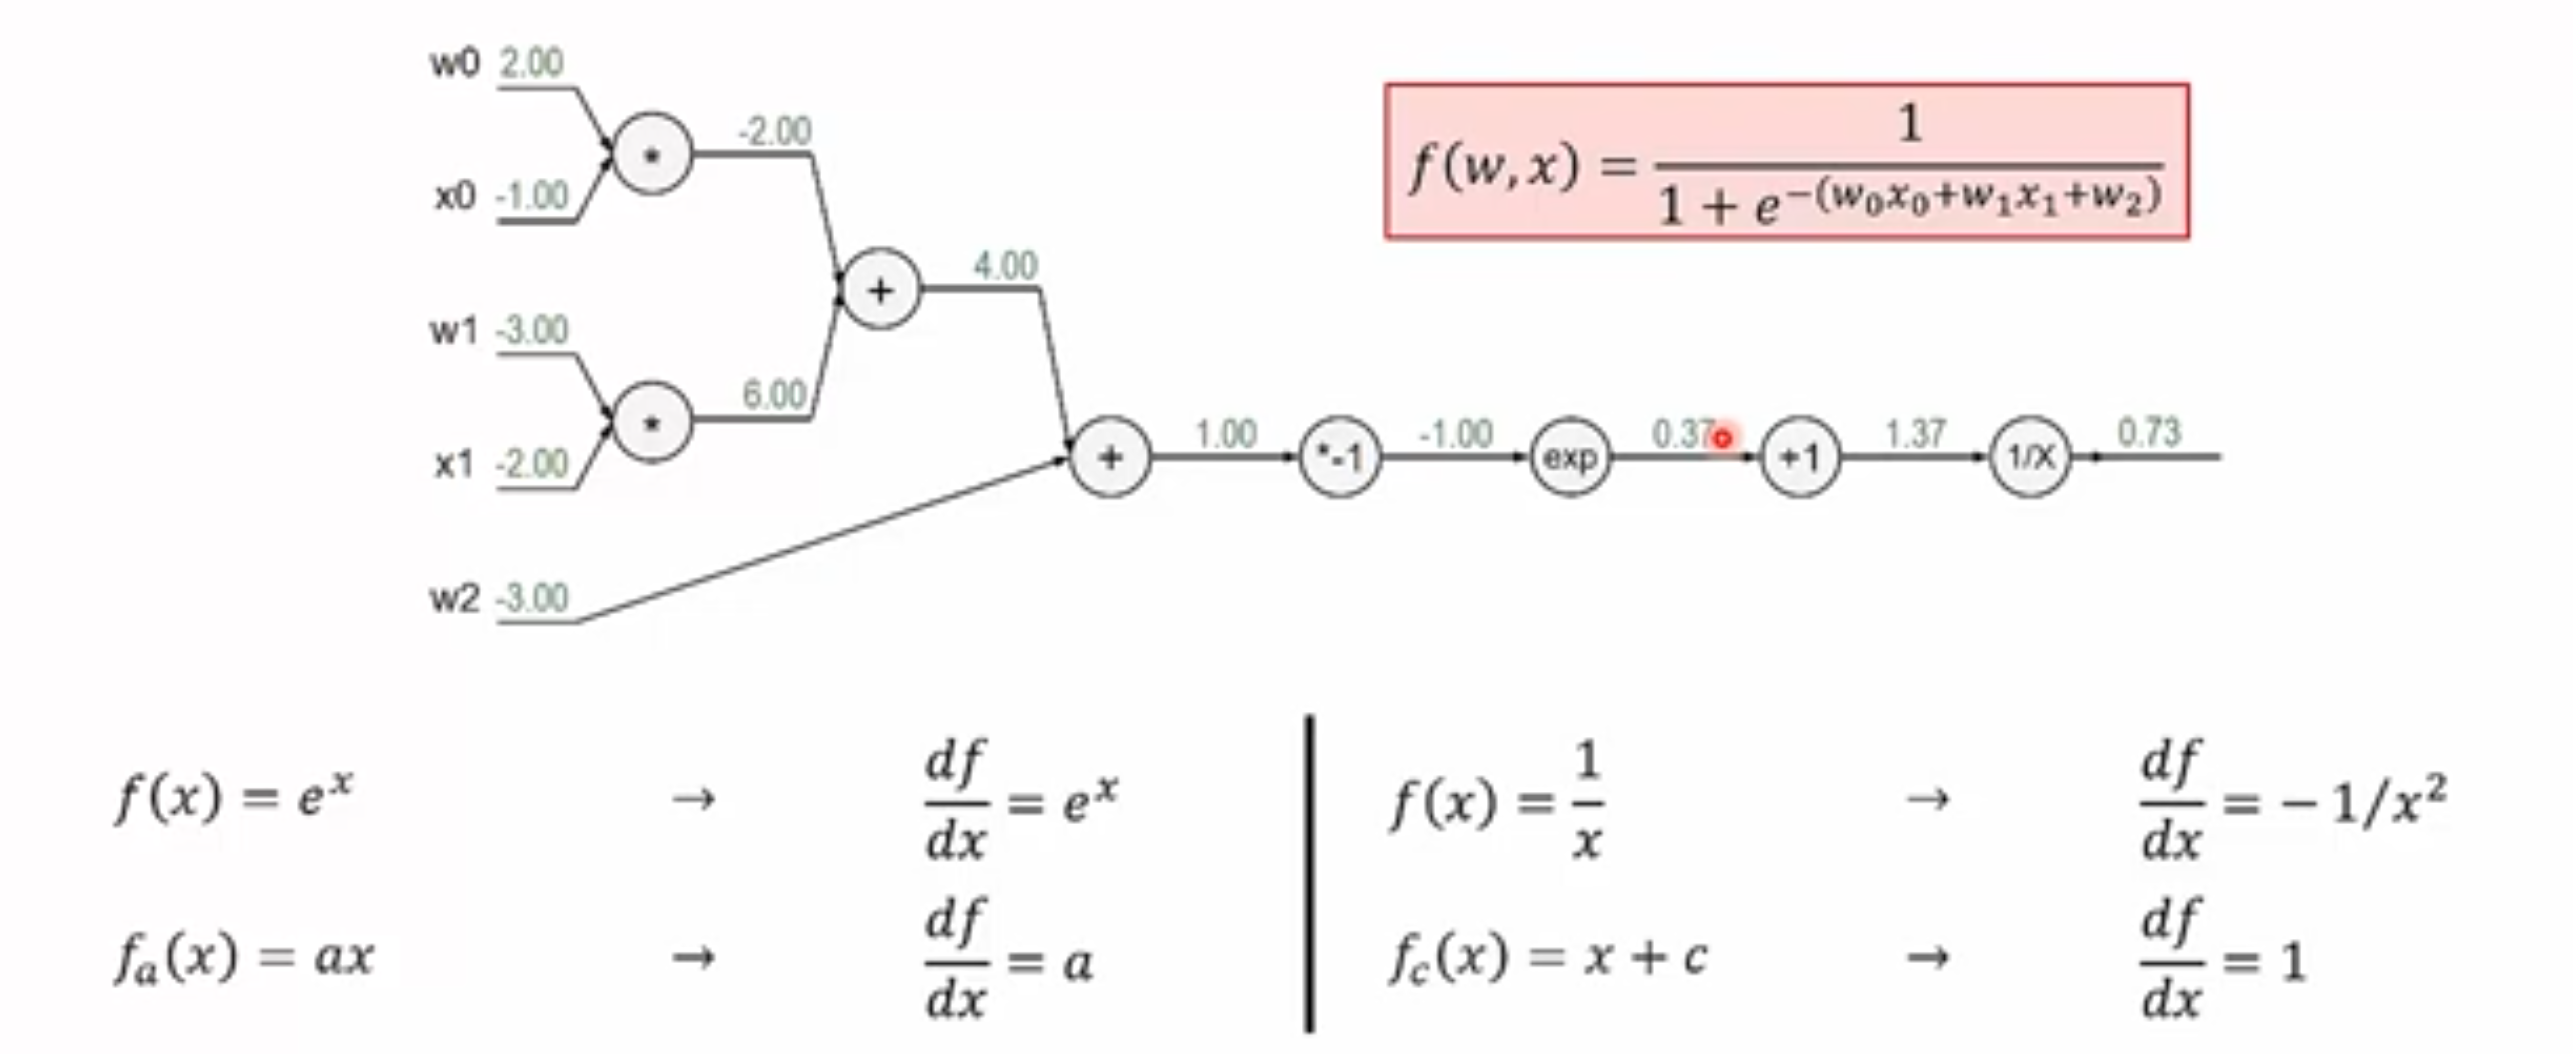

# Neural Network Training Process

## 1. Introduction
This notebook outlines the key steps in training a neural network, focusing on the forward pass, backward pass (backpropagation), and optimization. These steps involve calculating gradients and updating parameters iteratively to minimize the loss.

## 2. Forward Pass

### 2.1 Overview
The **forward pass** is the first step in training a neural network. It calculates the network's output for a given input, propagating through layers and computing the loss by comparing predictions to the true labels.

### 2.2 Steps in the Forward Pass
1. **Input Data**: Input data ($x$) is passed into the network.
2. **Layer Calculations**:
  - For each layer $l$, compute the activations ($y_l$):
    $$y_l = f(W_l \cdot x_l + b_l)$$
    where:
    - $W_l$ is the weight matrix for layer $l$
    - $b_l$ is the bias vector for layer $l$
    - $f$ is the activation function (e.g., ReLU, Sigmoid)
3. **Output Calculation**: The final layer generates the network output ($y_{\text{pred}}$).
4. **Loss Calculation**: The loss function ($L$) measures the error between $y_{\text{pred}}$ and $y_{\text{true}}$:
    $$L = \frac{1}{N} \sum_{i=1}^N (y_{\text{pred}} - y_{\text{true}})^2$$
    where $N$ is the number of samples.
5. **Store Intermediate Values**: Store intermediate values such as activations, weights, and outputs for use during the backward pass.




### 2.3 Code Example for Forward Pass

In [9]:
import numpy as np

# Example of a simple forward pass in Python
def forward_pass(input_data, weights, bias, activation_function):
   return activation_function(np.dot(input_data, weights) + bias)

# Example of ReLU activation function
def relu(x):
   return np.maximum(0, x)

# Example input data and parameters
input_data = np.array([1.0, 2.0, 3.0])  # Example input
weights = np.array([0.5, 0.3, 0.8])    # Example weights
bias = 0.1  # Example bias

# Forward pass computation
output = forward_pass(input_data, weights, bias, relu)
print("Output of the forward pass:", output)

Output of the forward pass: 3.6000000000000005


## 3. Backward Pass (Backpropagation)

### 3.1 Overview
The **backward pass**, or backpropagation, calculates gradients of the loss with respect to network parameters. These gradients guide parameter updates during optimization.

### 3.2 Steps in the Backward Pass
1. **Initialize Gradients**: Start from the output layer and move backwards
2. **Chain Rule Application**: For each layer $l$, compute gradients:
  $$\frac{\partial L}{\partial W_l} = \frac{\partial L}{\partial y_l} \cdot \frac{\partial y_l}{\partial W_l}$$
  $$\frac{\partial L}{\partial b_l} = \frac{\partial L}{\partial y_l} \cdot \frac{\partial y_l}{\partial b_l}$$

### 3.3 Code Example for Backward Pass



In [10]:
def backward_pass(output_grad, input_data, weights, activation_derivative):
   # Compute gradients for weights and bias
   input_grad = output_grad * activation_derivative
   weight_grad = np.outer(input_data, input_grad)
   bias_grad = input_grad
   
   return weight_grad, bias_grad

# Example derivative of ReLU
def relu_derivative(x):
   return np.where(x > 0, 1, 0)

## 4. Parameter Update

### 4.1 Gradient Descent Update
Parameters are updated using the computed gradients:
$$W_l = W_l - \alpha \frac{\partial L}{\partial W_l}$$
$$b_l = b_l - \alpha \frac{\partial L}{\partial b_l}$$
where $\alpha$ is the learning rate.

### 4.2 Code Example for Parameter Update
```python
def update_parameters(weights, bias, weight_grad, bias_grad, learning_rate):
   weights -= learning_rate * weight_grad
   bias -= learning_rate * bias_grad
   return weights, bias

# Example learning rate
learning_rate = 0.01

# Update parameters
weights, bias = update_parameters(weights, bias, weight_grad, bias_grad, learning_rate)

## 5. Complete Training Loop

```python
def train_step(input_data, target, weights, bias, learning_rate):
   # Forward pass
   output = forward_pass(input_data, weights, bias, relu)
   
   # Compute loss
   loss = np.mean((output - target) ** 2)
   
   # Backward pass
   output_grad = 2 * (output - target) / len(target)
   weight_grad, bias_grad = backward_pass(output_grad, input_data, weights, relu_derivative)
   
   # Update parameters
   weights, bias = update_parameters(weights, bias, weight_grad, bias_grad, learning_rate)
   
   return weights, bias, loss

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
   weights, bias, loss = train_step(input_data, target, weights, bias, learning_rate)
   if epoch % 10 == 0:
       print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Computational Graph Example for Neural Networks

## 1. Implementation of a Simple Computational Graph

This example demonstrates a computational graph for a simple neural network operation: $f(x,y) = (x + y) * sin(x)$

In [15]:
import numpy as np

class Node:
    def __init__(self, value=None):
        self.value = value
        self.grad = 0  # Gradient with respect to final output
        self.backward_fn = lambda: None  # Function to compute gradients
        self._parents = set()  # Parent nodes
        
    def __add__(self, other):
        other = other if isinstance(other, Node) else Node(other)
        result = Node()
        result.value = self.value + other.value
        result._parents = {self, other}
        
        def _backward():
            self.grad += result.grad
            other.grad += result.grad
            
        result.backward_fn = _backward
        return result
    
    def __mul__(self, other):
        other = other if isinstance(other, Node) else Node(other)
        result = Node()
        result.value = self.value * other.value
        result._parents = {self, other}
        
        def _backward():
            self.grad += other.value * result.grad
            other.grad += self.value * result.grad
            
        result.backward_fn = _backward
        return result
    
    def sin(self):
        result = Node()
        result.value = np.sin(self.value)
        result._parents = {self}
        
        def _backward():
            self.grad += np.cos(self.value) * result.grad
            
        result.backward_fn = _backward
        return result

def backward(node):
    """Compute gradients through backpropagation."""
    # Topological sort for backwards pass
    topo = []
    visited = set()
    
    def build_topo(v):
        if v not in visited:
            visited.add(v)
            for parent in v._parents:
                build_topo(parent)
            topo.append(v)
    
    build_topo(node)
    
    # Go one variable at a time and apply the chain rule
    node.grad = 1.0
    for v in reversed(topo):
        v.backward_fn()

## 2. Example Usage
Let's test our computational graph with a simple example:

In [16]:
# Example usage
def compute_graph():
    # Create input nodes
    x = Node(2.0)
    y = Node(3.0)
    
    # Forward pass: compute z = (x + y) * sin(x)
    z = (x + y) * x.sin()
    
    # Backward pass: compute gradients
    backward(z)
    
    print(f"Forward Pass Results:")
    print(f"x = {x.value}, y = {y.value}")
    print(f"z = (x + y) * sin(x) = {z.value}")
    print(f"\nBackward Pass Results (Gradients):")
    print(f"dz/dx = {x.grad}")
    print(f"dz/dy = {y.grad}")
    
    return z.value, x.grad, y.grad

# Run the example
result = compute_graph()

Forward Pass Results:
x = 2.0, y = 3.0
z = (x + y) * sin(x) = 4.546487134128409

Backward Pass Results (Gradients):
dz/dx = -1.1714367559100303
dz/dy = 0.9092974268256817


## 3. Visualization of the Computational Graph

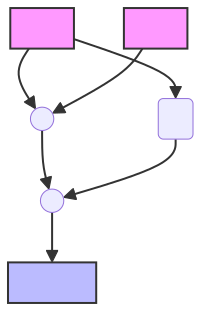

In [4]:
from IPython.display import SVG
def show_svg():
    return SVG(url='file:///E:/edu/Razavi/DEEP_LEARNING/My%20diagram.svg')

show_svg()

## 4. Extended Example with Multiple Operations


In [8]:
import numpy as np

class Node:
    def __init__(self, value):
        self.value = value  # Value of the node
        self.grad = 0.0     # Gradient (default is 0)
        self.children = []  # List of child nodes (for backpropagation)

    def __add__(self, other):
        # Add operation (forward pass)
        out = Node(self.value + other.value)
        out.children = [(self, 1), (other, 1)]  # Keep track of the nodes for backprop
        return out

    def __mul__(self, other):
        # Multiply operation (forward pass)
        out = Node(self.value * other.value)
        out.children = [(self, other.value), (other, self.value)]  # Track gradients for backprop
        return out

    def sin(self):
        # Sin operation (forward pass)
        out = Node(np.sin(self.value))
        out.children = [(self, np.cos(self.value))]  # Derivative of sin(x) is cos(x)
        return out

    def backward(self):
        # Backpropagation (compute gradients)
        self.grad = 1.0  # Start with the gradient of the output node (d/dx of output is 1)
        visited = set()  # To track nodes we've already processed to prevent double counting

        # Propagate the gradients backward through the graph
        nodes_to_visit = [self]
        while nodes_to_visit:
            node = nodes_to_visit.pop()
            if node in visited:
                continue
            visited.add(node)

            # Propagate gradients to the child nodes
            for child, weight in node.children:
                # Update the gradient of the child node
                child.grad += node.grad * weight
                nodes_to_visit.append(child)

# Define the extended example function
def extended_example():
    # Create more complex computation graph
    a = Node(1.0)
    b = Node(2.0)
    c = Node(3.0)

    # Compute: d = (a + b) * sin(c)
    d = (a + b) * c.sin()

    # Compute gradients
    d.backward()

    print("\nExtended Example Results:")
    print(f"a = {a.value}, b = {b.value}, c = {c.value}")
    print(f"d = (a + b) * sin(c) = {d.value}")
    print(f"Gradients:")
    print(f"dd/da = {a.grad}")
    print(f"dd/db = {b.grad}")
    print(f"dd/dc = {c.grad}")

# Run extended example
extended_example()



Extended Example Results:
a = 1.0, b = 2.0, c = 3.0
d = (a + b) * sin(c) = 0.4233600241796016
Gradients:
dd/da = 0.1411200080598672
dd/db = 0.1411200080598672
dd/dc = -2.9699774898013365


# Neural Network Training Process

## 1. Forward Pass (Calculations)

### Input Data
- **Purpose**: Starting point of neural network, representing input features
- Input data $x$ is fed into the network

### Layer Calculations
#### Layer 1
- Calculation: $y_1 = f(W_1 \cdot x + b_1)$
- Applies weights $W_1$, biases $b_1$, and activation function $f$

#### Layer 2
- Calculation: $y_2 = f(W_2 \cdot y_1 + b_2)$
- Processes output from previous layer

### Output
- Final output $y_{pred}$ computed after processing through all layers

### Loss Calculation
- Compare predicted output $y_{pred}$ with true values $y_{true}$
- Regression: Mean Squared Error (MSE)
  $L = \frac{1}{N} \sum_{i=1}^{N} (y_{pred} - y_{true})^2$
- Classification: Cross-Entropy Loss

### Regularization
- **Purpose**: Prevent overfitting by penalizing large weights
- L2 Regularization (Ridge): $L_{reg} = \lambda \sum_{i=1}^{N} W_i^2$
- L1 Regularization (Lasso): $L_{reg} = \lambda \sum_{i=1}^{N} |W_i|$
- Dropout: Randomly disable neurons during training

## 2. Backward Pass (Backpropagation)

### Gradient Calculation
- Compute gradient of loss function: 
  $\frac{\partial L}{\partial y_{pred}} = 2(y_{pred} - y_{true})$

### Chain Rule Propagation
- Propagate gradients backward through layers
- Gradient calculation: 
  $\frac{\partial L}{\partial W_l} = \frac{\partial L}{\partial y_l} \cdot \frac{\partial y_l}{\partial W_l}$

### Gradient Storage
- Store gradients for each weight and bias for optimization

## 3. Optimization (Parameter Update)

### Gradient Descent
- Update weights using learning rate $\alpha$
- Update rule: $W_{new} = W_{old} - \alpha \cdot \frac{\partial L}{\partial W}$

### Optimization Algorithms
- Standard Gradient Descent
- Stochastic Gradient Descent (SGD)
- Mini-Batch Gradient Descent
- Adam Optimizer

## 4. Training Iterations/Epochs

### Training Process
- Repeat forward pass, backward pass, and optimization
- One epoch = Complete pass through training dataset

### Stopping Criteria
- Maximum number of epochs reached
- Loss function converges
- Early stopping based on validation accuracy

## 5. Model Evaluation

### Performance Metrics
- Classification: Accuracy, F1 Score, Precision, Recall
- Regression: Mean Squared Error (MSE)

### Model Testing
- Verify generalization on unseen data

## 6. Conclusion

### Training Goal
- Minimize loss function
- Improve model accuracy by updating parameters

### Final Model
- Ready to make predictions on new data